# Tarea 3. Midiendo rendimiento y riesgo.

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://www.maxpixel.net/static/photo/1x/Wall-Street-Dices-Over-Newspaper-Profit-Loss-Risk-2656028.jpg" width="600px" height="400px" />

**Resumen.**
> En esta tarea descargarás datos históricos de precios y, con base en ellos, calcularás rendimientos. Luego se te pedirá resumir la distribución de rendimientos para cada instrumento calculando el rendimiento medio y volatilidad. De igual manera, se te pedirá presentar dicho resumen en una base anual.

**Criterio de revisión.**
> Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.

**Antes de comenzar.**
> Por favor, copiar y pegar este archivo en otra ubicación. Antes de comenzar, nombrarlo *Tarea3_ApellidoNombre*, sin acentos y sin espacios; por ejemplo, en mi caso el archivo se llamaría *Tarea3_JimenezEsteban*. Resolver todos los puntos en dicho archivo y subir en este espacio.

## 1. Descarga de datos (10 puntos)

Descargar los precios diarios ajustados en el cierre para el índice S&P 500 (^GSPC), y para 15 compañías que compongan dicho índice, durante el periodo comprendido del primero de enero del 2015 hasta el día en que realicen la tarea.

1. Mostrar el DataFrame de los precios diarios (5 puntos).
2. Graficar los precios (5 puntos).

In [1]:
import pandas_datareader.data as web
import yfinance as yf
import pandas as pd
import numpy as np
%matplotlib inline

yf.pdr_override()

In [2]:
def get_closes(tickers, start_date=None, end_date=None):
    closes = web.get_data_yahoo(tickers=tickers, start=start_date, end=end_date)['Adj Close']
    closes.sort_index(inplace=True)
    return closes

tickers = ["^GSPC", "AAPL", "MSFT", "AMZN", "GOOG", "NFLX", "TSLA", "NVDA", "JPM", "JNJ", "V", "UNH", "HD", "PG", "BAC", "MA"]
closes = get_closes(tickers, "2015-01-01", "2023-02-09")
closes

[*********************100%***********************]  16 of 16 completed


,AAPL,AMZN,BAC,GOOG,HD,JNJ,JPM,MA,MSFT,NFLX,NVDA,PG,TSLA,UNH,V,^GSPC
Date,,,,,,,,,,,,,,,,
2015-01-02,24.603207,15.426000,15.366434,26.168653,86.234505,84.305046,49.936508,81.394279,40.811440,49.848572,4.834949,71.304497,14.620667,89.239861,62.620522,2058.199951
2015-01-05,23.910093,15.109500,14.920036,25.623152,84.425262,83.716248,48.386227,79.104813,40.436134,47.311428,4.753287,70.965492,14.006000,87.769913,61.238255,2020.579956
2015-01-06,23.912346,14.764500,14.473641,25.029282,84.166824,83.304863,47.131618,78.933815,39.842644,46.501431,4.609173,70.642212,14.085333,87.592812,60.843658,2002.609985
2015-01-07,24.247648,14.921000,14.542309,24.986401,87.051605,85.143898,47.203556,80.161659,40.348862,46.742859,4.597165,71.012772,14.063333,88.487152,61.658852,2025.900024
2015-01-08,25.179295,15.023000,14.842774,25.065184,88.977531,85.813370,48.258369,81.408539,41.535835,47.779999,4.770101,71.824883,14.041333,92.710945,62.485851,2062.139893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-02,150.820007,112.910004,36.130001,108.800003,339.790009,165.539993,138.940002,374.940002,264.600006,366.890015,217.089996,142.169998,188.270004,470.829987,229.111252,4179.759766
2023-02-03,154.500000,103.389999,36.430000,105.220001,331.500000,164.610001,141.089996,373.910004,258.350006,365.899994,211.000000,142.610001,189.979996,472.019989,229.680145,4136.479980
2023-02-06,151.729996,102.180000,36.369999,103.470001,329.269989,163.360001,141.919998,372.970001,256.769989,361.480011,210.889999,141.399994,194.759995,475.239990,228.991501,4111.080078


<AxesSubplot:xlabel='Date'>

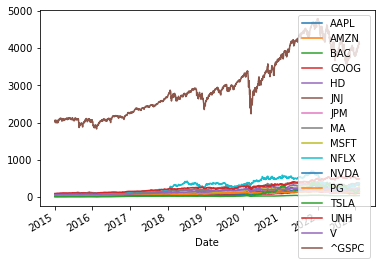

In [3]:
closes.plot()

## 2. Cálculo de rendimientos diarios (20 puntos)

A partir de los precios que descargaste en el anterior punto, calcular los rendimientos porcentuales diarios.

1. Mostrar el DataFrame de los rendimientos porcentuales diarios (10 puntos).
2. Graficar los rendimientos (10 puntos).

In [4]:
ret = closes.pct_change().dropna()
ret

,AAPL,AMZN,BAC,GOOG,HD,JNJ,JPM,MA,MSFT,NFLX,NVDA,PG,TSLA,UNH,V,^GSPC
Date,,,,,,,,,,,,,,,,
2015-01-05,-0.028172,-0.020517,-0.029050,-0.020846,-0.020980,-0.006984,-0.031045,-0.028128,-0.009196,-0.050897,-0.016890,-0.004754,-0.042041,-0.016472,-0.022074,-0.018278
2015-01-06,0.000094,-0.022833,-0.029919,-0.023177,-0.003061,-0.004914,-0.025929,-0.002162,-0.014677,-0.017121,-0.030319,-0.004555,0.005664,-0.002018,-0.006444,-0.008893
2015-01-07,0.014022,0.010600,0.004744,-0.001713,0.034275,0.022076,0.001526,0.015555,0.012705,0.005192,-0.002605,0.005246,-0.001562,0.010210,0.013398,0.011630
2015-01-08,0.038422,0.006836,0.020661,0.003153,0.022124,0.007863,0.022346,0.015555,0.029418,0.022188,0.037618,0.011436,-0.001564,0.047733,0.013413,0.017888
2015-01-09,0.001073,-0.011749,-0.017929,-0.012951,-0.017147,-0.013629,-0.017387,-0.012744,-0.008405,-0.015458,0.004028,-0.009331,-0.018802,-0.009360,-0.014823,-0.008404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-02,0.037063,0.073799,0.005846,0.072661,0.035661,0.003759,-0.004656,0.002299,0.046884,0.013536,0.036575,-0.007123,0.037815,-0.052656,-0.005803,0.014699
2023-02-03,0.024400,-0.084315,0.008303,-0.032904,-0.024397,-0.005618,0.015474,-0.002747,-0.023621,-0.002698,-0.028053,0.003095,0.009083,0.002527,0.002483,-0.010355
2023-02-06,-0.017929,-0.011703,-0.001647,-0.016632,-0.006727,-0.007594,0.005883,-0.002514,-0.006116,-0.012080,-0.000521,-0.008485,0.025161,0.006822,-0.002998,-0.006140


<AxesSubplot:xlabel='Date'>

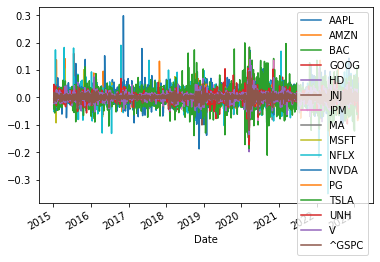

In [34]:
ret.plot()

## 3. Resumen de distribución de rendimientos (30 puntos)

Con base en los rendimientos que calculaste en el punto anterior:

1. Calcular el rendimiento medio diario para el índice S&P 500 y para los demás activos. Anualizar los rendimientos (15 puntos). 

2. Calcular la volatilidad diaria para el índice S&P 500 y para los demás activos. Anualizar (15 puntos).

Por favor, reportar los resultados en DataFrames tal y como lo vimos en clase.

In [9]:
daily_data = pd.DataFrame({"Rendimiento medio": ret.mean(), "Volatilidad": ret.std()}).T
daily_data

,AAPL,AMZN,BAC,GOOG,HD,JNJ,JPM,MA,MSFT,NFLX,NVDA,PG,TSLA,UNH,V,^GSPC
Rendimiento medio,0.001071,0.001139,0.000632,0.000820,0.000771,0.000394,0.000675,0.000905,0.001079,0.001401,0.002337,0.000399,0.001933,0.000969,0.000772,0.000411
Volatilidad,0.018853,0.021140,0.020389,0.018063,0.015842,0.011684,0.017902,0.018018,0.017798,0.028780,0.030400,0.012113,0.035992,0.016735,0.016376,0.011869


In [10]:
annual_data = pd.DataFrame({"Rendimiento medio": ret.mean()*252, "Volatilidad": ret.std()*(252)**0.5}).T
annual_data

,AAPL,AMZN,BAC,GOOG,HD,JNJ,JPM,MA,MSFT,NFLX,NVDA,PG,TSLA,UNH,V,^GSPC
Rendimiento medio,0.269884,0.287146,0.159189,0.206686,0.194408,0.099196,0.170019,0.228100,0.271991,0.352969,0.589037,0.100581,0.487132,0.244178,0.194425,0.103552
Volatilidad,0.299289,0.335585,0.323667,0.286742,0.251479,0.185484,0.284191,0.286027,0.282527,0.456866,0.482585,0.192285,0.571362,0.265663,0.259958,0.188410


## 4. Gráfico rendimientos esperados vs. volatilidad (40 puntos)

Graficar los rendimientos medios anuales contra las desviaciones estándar del índice S&P 500 y de los demás activos. Como vimos en clase, la volatilidad debe ir en el eje $x$ y el rendimiento esperado en el eje $y$. Se deben etiquetar los ejes y dar detalles para un completo entendimiento de la gráfica.

1. Gráfico (10 puntos).
2. Ajuste una línea recta a los puntos obtenidos. Dar la ecuación (10 puntos).
3. A partir del gráfico y de la línea recta ajustada, concluya acerca de la relación rendimiento/riesgo (específicamente acerca de $\beta_0$ y $\beta_1$) (20 puntos).

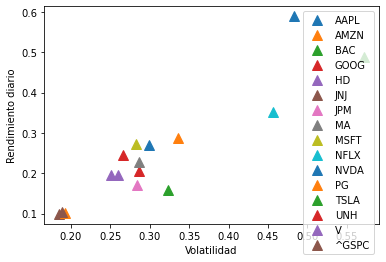

In [26]:
from matplotlib import pyplot as pt

for i in range(len(annual_data.axes[1])):
    pt.plot(annual_data.iloc[1, i], annual_data.iloc[0, i], "^", ms=10, label=annual_data.columns[i])
    
pt.xlabel("Volatilidad")
pt.ylabel("Rendimiento diario")
pt.legend()

Ecuación: -0.10335819063172502 + 1.1332974332803172 vol


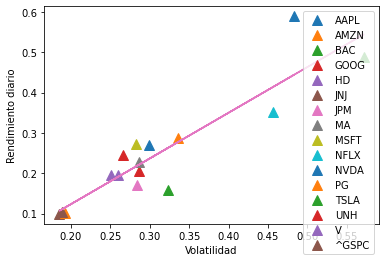

In [33]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X=annual_data.iloc[1].values.reshape([-1, 1]), y=annual_data.iloc[0].values)
b = [model.intercept_, model.coef_[0]]
print("Ecuación: {} + {} vol".format(b[0], b[1]))

for i in range(len(annual_data.axes[1])):
    pt.plot(annual_data.iloc[1, i], annual_data.iloc[0, i], "^", ms=10, label=annual_data.columns[i])
    
pt.plot(annual_data.iloc[1].values, model.predict(annual_data.iloc[1].values.reshape([-1, 1])))

pt.xlabel("Volatilidad")
pt.ylabel("Rendimiento diario")
pt.legend()

Suponiendo un mercado con los activos utilizados en este ejercicio, este tendría una tasa libre de riesgo de -0.103.

Por cada unidad de riesgo, el rendimiento esperado aumenta 1.133

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>